# Gavin Glosser, Natalie Bett: CSB Final Project

In [68]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  n


Nothing done.


In [4]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [5]:
def TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma):    
    #y[0] = u
    #y[1] = v
    
    dydt = np.zeros(2)
    
    dydt[0] = alpha_1/(1+y[1]**beta) - y[0]
    dydt[1] = alpha_2/(1+y[0]**gamma) - y[1]
    
    return dydt

In [15]:
def plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, row, col):
    ode_sol_list = []
    
    #Solve the ode for each element of y0 and plot solution
    for i in range(len(y0)):
        ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0[i],t_eval=t)
        ode_sol_list.append(ode_sol)
        # Plot dynamics
        axs[row, col].plot(ode_sol_list[i].y[0],ode_sol.y[1],'m',linewidth = 0.5)
        axs[row, col].plot(ode_sol_list[i].y[0][0],ode_sol.y[1][0],'m.', markersize = 4) #starting point

In [7]:
def plot_nullclines(alpha_1, alpha_2, beta, gamma, x, row, col):
    u = alpha_1/(1+x**beta)
    v = alpha_2/(1+x**gamma)
    axs[row,col].plot(u,x,'r--', label = 'du/dt = 0', alpha=0.5)
    axs[row,col].plot(x,v,'b--', label = 'dv/dt = 0', alpha=0.5)
    axs[row,col].set_xlabel('u')
    axs[row,col].set_ylabel('v')
    axs[row,col].legend();

In [17]:
def plot_initial_conditions(t, alpha_1, alpha_2, beta, gamma, tspan, y0, col):
    tolerance = 0.1
    trig_count = 0
    untrig_count = 0
    #Detect ending point of each solution within a small tolerance range
    for i in y0:
        ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,i,t_eval=t)
        if (ode_sol.y[0][(ode_sol.y[0].shape[0]) - 1] < 0 + tolerance) and (ode_sol.y[1][(ode_sol.y[1].shape[0]) - 1] > alpha_2 - tolerance):
            axs[col].scatter(i[0], i[1], color = 'red',  linewidths = 0.2)
            untrig_count += 1
        else:
            axs[col].scatter(i[0], i[1], color = 'green',  linewidths = 0.2)
            trig_count += 1
    #calculate success rate
    success_rate = trig_count/(untrig_count + trig_count)
    axs[col].set_ylabel('v')
    axs[col].set_xlabel('u')
    return success_rate

1. Test the alpha values and how it affects the sensitivity of the system as the concentration of protain v is gradually decreased. Plot these against high a normal beta and gamma values to better understand dynamics and the nature of these parameters.

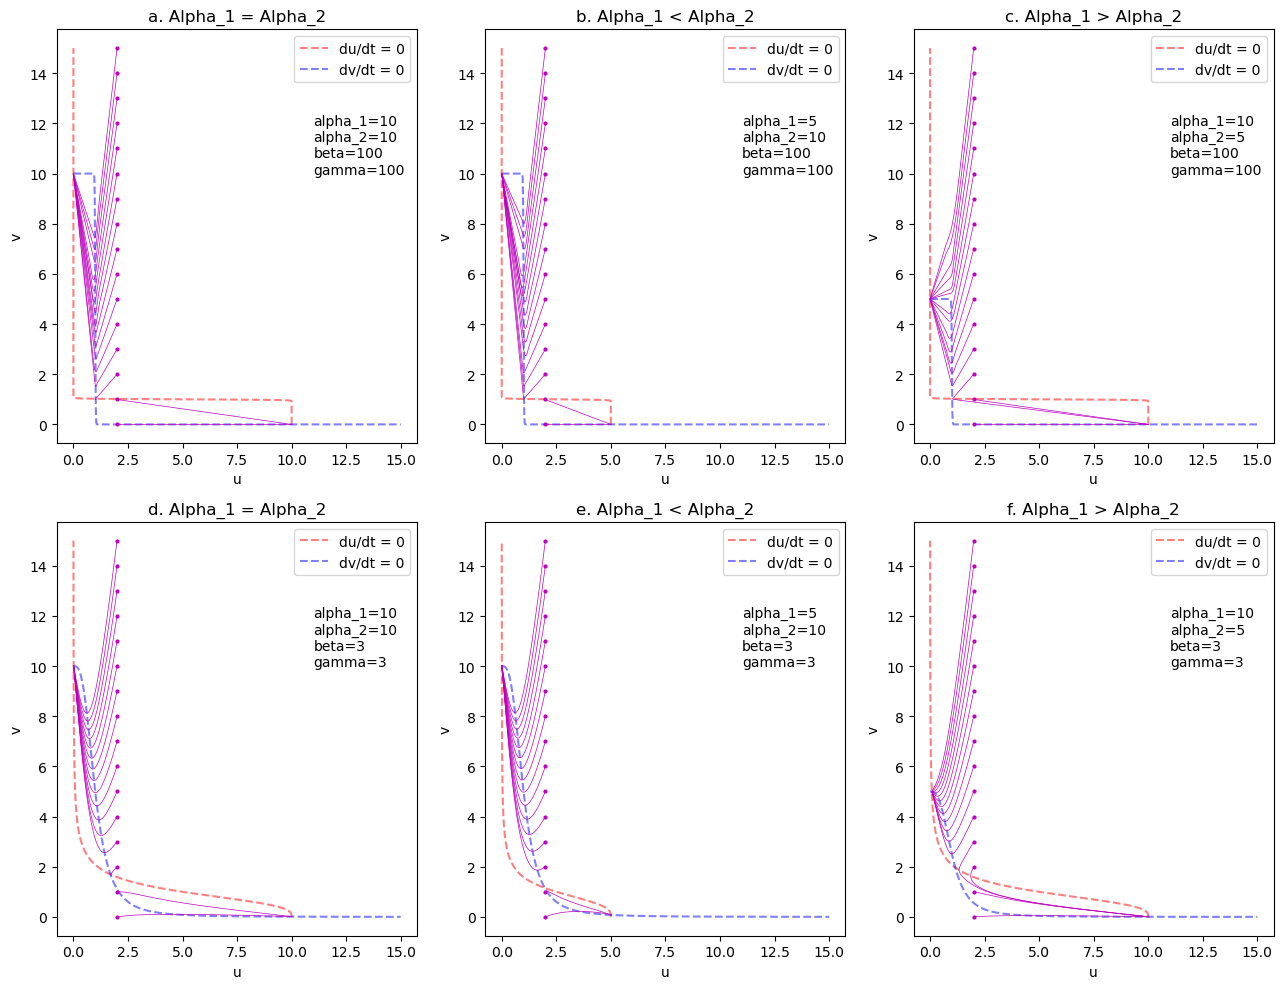

In [18]:
#Parameters
beta = 100
gamma = 100
u0 = 2
x_max = 15
x = np.linspace(0,x_max,1000)

[fig,axs] = plt.subplots(2,3,figsize=[13,10])

# Simulate dynamics
# Initial Conditions
v0 = np.linspace(0,15,16)
y0 = []
initial_point = []
for i in v0:
    initial_point = [u0,i]
    y0.append(initial_point)
    
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

#Plot dynamics with equal alpha_1 & alpha_2
alpha_1 = 10
alpha_2 = alpha_1
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 0, 0)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0, 0)
axs[0,0].set_title('a. Alpha_1 = Alpha_2')
axs[0,0].text(11,10,'alpha_1=10\nalpha_2=10\nbeta=100\ngamma=100')

#Small alpha_1 and large alpha_2
alpha_1 = 5
alpha_2 = 10
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 0, 1)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0, 1)
axs[0,1].set_title('b. Alpha_1 < Alpha_2')
axs[0,1].text(11,10,'alpha_1=5\nalpha_2=10\nbeta=100\ngamma=100')

#Small alpha_2 and large alpha_1
alpha_1 = 10
alpha_2 = 5
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 0, 2)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0, 2)
axs[0,2].set_title('c. Alpha_1 > Alpha_2')
axs[0,2].text(11,10,'alpha_1=10\nalpha_2=5\nbeta=100\ngamma=100')

#Re plot all alpha conditions but with more realistic beta and gamma values
beta = 3
gamma = 3
alpha_1 = 10
alpha_2 = alpha_1
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 1, 0)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1, 0)
axs[1,0].set_title('d. Alpha_1 = Alpha_2')
axs[1,0].text(11,10,'alpha_1=10\nalpha_2=10\nbeta=3\ngamma=3')

alpha_1 = 5
alpha_2 = 10
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 1, 1)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1, 1)
axs[1,1].set_title('e. Alpha_1 < Alpha_2')
axs[1,1].text(11,10,'alpha_1=5\nalpha_2=10\nbeta=3\ngamma=3')

alpha_1 = 10
alpha_2 = 5
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 1, 2)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1, 2)
axs[1,2].set_title('f. Alpha_1 > Alpha_2')
axs[1,2].text(11,10,'alpha_1=10\nalpha_2=5\nbeta=3\ngamma=3')

plt.tight_layout();

2. Test a wider range of initial conditions and color code them depending on which steady state they lead to.

Text(0.5, 1.0, 'Alpha_1 > Alpha_2\nSuccess Rate = 0.685')

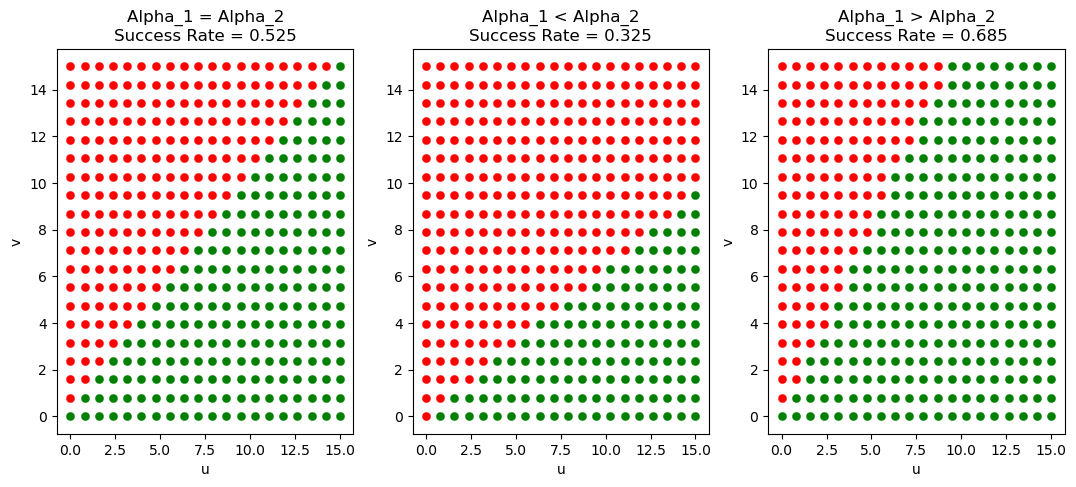

In [19]:
[fig,axs] = plt.subplots(1,3,figsize=[13,5])

beta = 3
gamma = 3
x_max = 15
x = np.linspace(0,x_max,1000)
u0 = np.linspace(0,15,20)
v0 = np.linspace(0,15,20)
y0 = []
initial_point = []
for i in v0:
    for j in u0:
        initial_point = [j, i]
        #if initial_point[0] != initial_point[1]:
        y0.append(initial_point)

#plot range of intial conditions and detect their ending point and color according to that ending point
alpha_1 = 10
alpha_2 = alpha_1
success_rate = plot_initial_conditions(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0)
axs[0].set_title(f'Alpha_1 = Alpha_2\nSuccess Rate = {success_rate}')

alpha_1 = 5
alpha_2 = 10
success_rate = plot_initial_conditions(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1)
axs[1].set_title(f'Alpha_1 < Alpha_2\nSuccess Rate = {success_rate}')

alpha_1 = 10
alpha_2 = 5
success_rate = plot_initial_conditions(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 2)
axs[2].set_title(f'Alpha_1 > Alpha_2\nSuccess Rate = {success_rate}')